In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [2]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/Figure2/"

In [3]:
#load the rescuability for single sites in His3p
rescuabilitySite_data = pd.read_csv(readdata_dir + "RescuabilityFile/singleSiteRescuability.txt",sep = "\t")
rescuabilitySite_datakeep = rescuabilitySite_data[rescuabilitySite_data["#unfitGenotypes"]!=0]
rescuabilitySite_datakeep

,site,#unfitGenotypes,rescuability_mean,rescuability_std,WCN,RSA,conservation,if_interface,ss
1,7,1885,0.001444,0.012164,2.220242,51.285240,0.209815,0,strand
2,8,1357,0.003506,0.024648,2.311773,6.082375,0.473268,0,strand
3,9,1694,0.003102,0.024646,2.207231,51.553672,0.256234,0,loop
5,11,1240,0.004161,0.029739,2.216342,58.587140,0.245119,1,strand
7,13,2350,0.007539,0.019568,2.309932,59.209402,0.396356,1,loop
...,...,...,...,...,...,...,...,...,...
279,207,84,0.478571,0.071845,2.401775,19.123932,0.130734,1,loop
280,208,246,0.439900,0.079992,2.123172,34.895833,0.073833,0,loop
281,209,350,0.438050,0.063563,2.018889,65.915698,0.169866,1,loop
282,210,93,0.446778,0.076896,2.058885,55.235043,0.474755,0,loop


In [4]:
#load the rescuability for nonsense data 
rescuabilitySite_dataNonsense = pd.read_csv(readdata_dir + "RescuabilityFile/singleSiteRescuability_Nonsense.txt",sep = "\t")
rescuabilitySite_datakeepNonsense = rescuabilitySite_dataNonsense[rescuabilitySite_dataNonsense["#unfitGenotypes"]!=0]
rescuabilitySite_datakeepNonsense

,site,#unfitGenotypes,rescuability_mean,rescuability_std
1,7,115,0.006295,0.012488
2,8,83,0.004680,0.007350
3,9,95,0.005955,0.012972
5,11,66,0.008164,0.015431
7,13,23,0.027384,0.023609
...,...,...,...,...
284,207,279,0.002914,0.007863
285,208,288,0.002316,0.007483
286,209,417,0.002136,0.006521
287,210,432,0.002217,0.006726


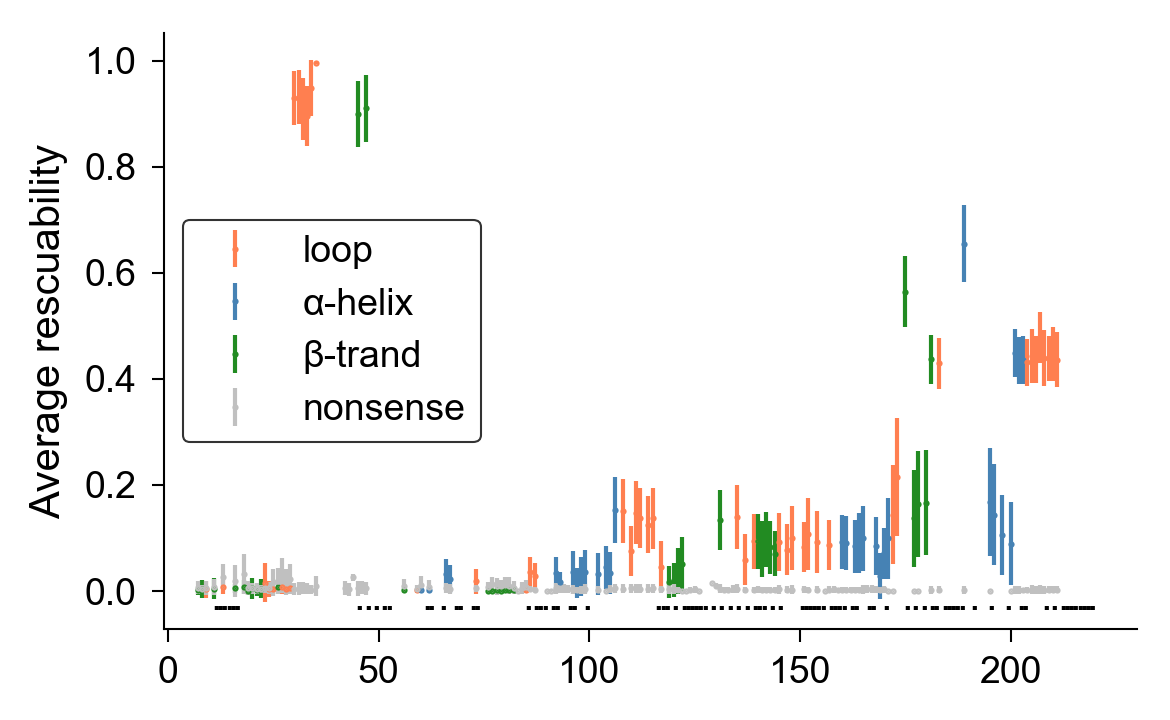

In [13]:
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(4.0,2.5))

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for row in range(rescuabilitySite_datakeep.shape[0]):
    single_site = rescuabilitySite_datakeep.iloc[row,:]["site"]
    if rescuabilitySite_datakeep[rescuabilitySite_datakeep["site"] == single_site]["ss"].values == 'loop':
        p1 = plt.errorbar(single_site,rescuabilitySite_datakeep["rescuability_mean"].values[row],\
            yerr = rescuabilitySite_datakeep["rescuability_std"].values[row]/1.5,\
            fmt=".",ecolor='coral',elinewidth=1.0,capsize=0,ms=1,color="coral")
        
    if rescuabilitySite_datakeep[rescuabilitySite_datakeep["site"] == single_site]["ss"].values  == 'helix':
        p2 = plt.errorbar(single_site,rescuabilitySite_datakeep["rescuability_mean"].values[row],\
            yerr = rescuabilitySite_datakeep["rescuability_std"].values[row]/1.5,\
            fmt=".",ecolor='steelblue',elinewidth=1.0,capsize=0,ms=1,color="steelblue")    
        
    if rescuabilitySite_datakeep[rescuabilitySite_datakeep["site"] == single_site]["ss"].values == 'strand':
        p3 = plt.errorbar(single_site,rescuabilitySite_datakeep["rescuability_mean"].values[row],\
            yerr = rescuabilitySite_datakeep["rescuability_std"].values[row]/1.5,\
            fmt = ".",ecolor = 'forestgreen',elinewidth=1.0,capsize=0,ms=1,color="forestgreen")

#the analysis for the nonsense genotypes
p4 = plt.errorbar(rescuabilitySite_datakeepNonsense["site"].values,rescuabilitySite_datakeepNonsense["rescuability_mean"].values,\
            yerr=rescuabilitySite_datakeepNonsense["rescuability_std"].values,\
            fmt=".",ecolor='silver',elinewidth=1.0,capsize=0,ms=1,color="silver",label="Nonsense")



legend  = plt.legend([ p1,p2,p3,p4], [ 'loop','α-helix','β-trand','nonsense'], scatterpoints=1,edgecolor='black',fontsize=9,
          title_fontsize = 8)    
legend = legend.get_frame().set_linewidth(0.5)
plt.xticks(fontsize = 9)

plt.yticks(fontsize = 9)
plt.ylabel("Average rescuability",fontsize=10)


#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)

ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=3)
#save figure
plt.xlim([-1,230])
plt.tight_layout()

chainAQ_interface = [44,46,60,61,64,67,125,149,150,151,152,153,154,183,184,185,186,187,190,
                    13,14,84,86,87,88,90,91,94,149,150,151,156,157,158,159,161,162,165]
chainAL_interface = [46,48,50,51,64,67,68,71,72,121,122,123,124,125,126,128,130,180,181,183,187,190,194,198,201,202,
                    115,116,117,119,121,130,132,134,136,138,140,142,144,174,176,178,207,209,211,212,213,214,215,217]
chainQL_interface = [10,11,12,13,14,15,90,91,94,95,98,138,139,140,162,165,166,169,215,216,217,218,10,11,12,13,14,
                    91,94,95,98,138,139,140,162,165,166,169,215,216,217,218]

interface_list = [ ]
interface_list.extend(chainAL_interface)
interface_list.extend(chainAQ_interface)
interface_list.extend(chainQL_interface)
interface_set = set(interface_list)
for pos_single in interface_set:
    plt.text(pos_single,-0.035,".",color = "k")



plt.savefig(savedata_dir + "RescuabilityForSingleSite.png" ,dpi = 300)


In [17]:
#plot the secondary structure label 
data_dir = "D:/Develop/Compensatory-Evolution/Analysis/Wenhong/DATA/"
structure_data = pd.read_csv(data_dir + "His3_disordered_region.csv",sep=',')
structure_data

,position,aa,structure,aa_disorder,aa_segN
0,3,E,0,1,[]
1,4,Q,+,1,[]
2,5,K,E,0,[]
3,6,A,E,0,['S12']
4,7,L,E,0,['S12']
...,...,...,...,...,...
212,215,T,S,1,[]
213,216,K,S,1,[]
214,217,G,S,1,[]
215,218,V,0,1,[]


In [18]:
import argparse
import matplotlib.patches as mpl_patches
import matplotlib.ticker as ticker
resn_labels, ss_elements = [], []

for row in range(structure_data.shape[0]):
    resn = structure_data["position"].values[row]
    ss = structure_data["structure"].values[row]
    ss_elements.append(ss)
    resn_labels.append(resn)



n_res = len(ss_elements)
ss_dict = {'H': 'H', 'G': 'H', 'I': 'H',
           'B': 'E', 'E': 'E',
           'T': 'T', 'S': 'T'}



# Get strecthes of continuous elements

ss_blocks = []  # (type, start, end)
prev_ss = None
for idx, elem in enumerate(ss_elements):
    reduced_elem = ss_dict.get(elem, 'C')
    if reduced_elem != prev_ss:
        ss_blocks.append([reduced_elem, idx, idx])
        prev_ss = reduced_elem
    ss_blocks[-1][-1] = idx

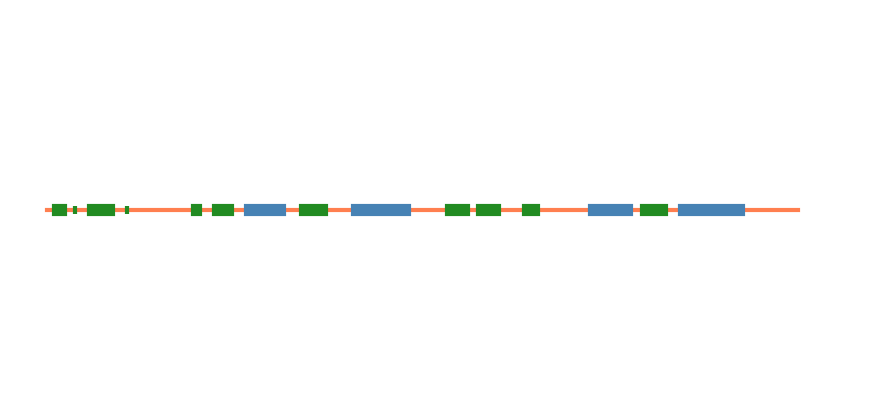

In [20]:
plt.figure(figsize=(3.0,1.5))


ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(111)
plt.xlim(0,225)
plt.ylim(-0.5,0.5)
plt.plot([3,219],[0,0],color = "coral",linewidth=1)
for single_list in ss_blocks:
    a,b,c = single_list
    if a == "H":
        ax.add_patch(matplotlib.patches.Rectangle((b+3,-0.01), c-b+0.01, 0.02,linewidth=1,color = "steelblue",zorder=10))
    if a == "E":
        ax.add_patch(matplotlib.patches.Rectangle((b+3,-0.01), c-b+0.01, 0.02,linewidth=1,color = "forestgreen",zorder=10))        
        
#save the figure
plt.xlim([-1,230])
plt.tight_layout()
plt.savefig(savedata_dir + "SSlabel_eachPosition.png" ,dpi = 300)

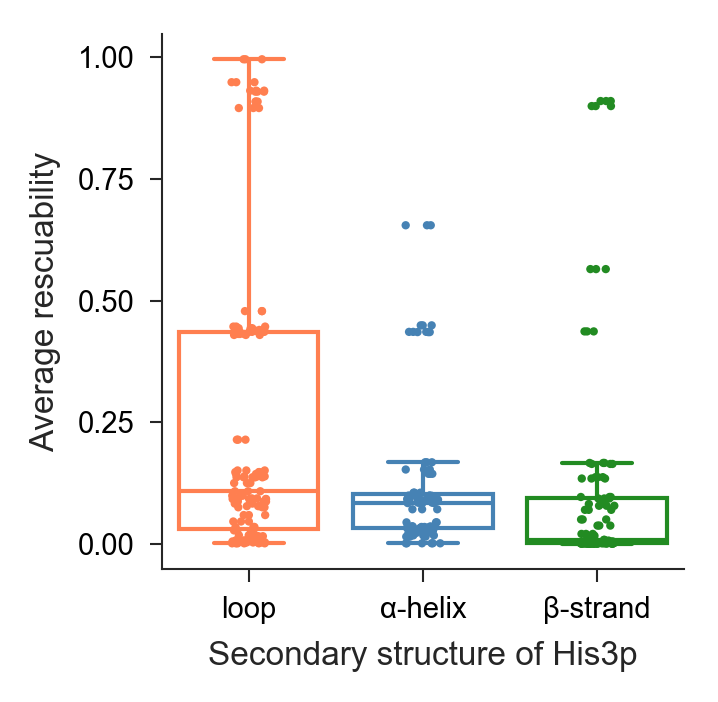

In [36]:
#plot the boxplot about the difference of rescuability for single sites
import seaborn as sns 
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(2.5,2.5))
sns.set(style='ticks')
ax = plt.subplot(111)
sns.boxplot(x= 'ss',y='rescuability_mean',linewidth=1.0,color="white",fliersize=0,
                data = rescuabilitySite_datakeep,ax=ax,order = ['loop','helix','strand'] )

#set each single box artiest
color_map = {0:"coral",1:"steelblue",2:"forestgreen",}
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = color_map[i]
    artist.set_edgecolor(col)


    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)


    sns.stripplot(x= 'ss',y='rescuability_mean',size=2
              ,jitter=0.1, data = rescuabilitySite_datakeep ,ax=ax, order = ['loop','helix','strand'],palette = 
                  ["coral","steelblue","forestgreen"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks(fontsize = 6,color = "black")
plt.yticks(fontsize = 7,color = "black")
plt.ylabel("Average rescuability",fontsize=8)
plt.xlabel("Secondary structure of His3p",fontsize=8)

#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=3)
plt.xticks([0,1,2],["loop","α-helix","β-strand"],fontsize=7)
plt.tight_layout()
#save the figure
plt.savefig(savedata_dir + "ssboxrescuability.png",dpi = 300)

In [75]:
#using U test 
print(stats.mannwhitneyu(rescuabilitySite_datakeep[rescuabilitySite_datakeep["ss"] == 'loop']["rescuability_mean"].values,
                  rescuabilitySite_datakeep[rescuabilitySite_datakeep["ss"] == 'helix']["rescuability_mean"].values,
                         alternative = "greater"))

print(stats.mannwhitneyu(rescuabilitySite_datakeep[rescuabilitySite_datakeep["ss"] == 'loop']["rescuability_mean"].values,
                  rescuabilitySite_datakeep[rescuabilitySite_datakeep["ss"] == 'strand']["rescuability_mean"].values,
                         alternative = "greater"))

print(stats.mannwhitneyu(rescuabilitySite_datakeep[rescuabilitySite_datakeep["ss"] == 'helix']["rescuability_mean"].values,
                  rescuabilitySite_datakeep[rescuabilitySite_datakeep["ss"] == 'strand']["rescuability_mean"].values,
                       alternative = "greater"))

MannwhitneyuResult(statistic=924.0, pvalue=0.0232377591642966)
MannwhitneyuResult(statistic=1173.0, pvalue=0.0005167771785196837)
MannwhitneyuResult(statistic=719.0, pvalue=0.01187149704257314)


In [43]:
#Unfit genotypes can be divided into three groups >50% in helix or in strand or in loop regions
rescuabilityData = pd.read_csv(readdata_dir + "MLFile/MLPrepare_data.tsv",sep = "\t")
rescuabilityData

,aa_seq,dist_Scer,max_WCN_mutaa,min_WCN_mutaa,mean_WCN_mutaa,median_WCN_mutaa,max_conservation_mutaa,min_conservation_mutaa,mean_conservation_mutaa,median_conservation_mutaa,...,QIAN880103_true,PALJ810108_true,JOND750102_true,MAXF760104_true,GEIM800109_true,DAYM780101_true,FINA910103_true,#genotypesWithAddiSubs,rescuability,if_res
0,NAVGAVRGVERFGSGFAPLDEALSRSVVDL,4,3.340090,2.357107,2.706296,2.563993,0.771319,0.238430,0.486062,0.467250,...,4.06,32.04,63.64,32.60,33.98,198.6,31.6,335,0.127229,1
1,EAIGAVRGVERFGSGFAPLDEALSRSVVDF,4,3.340090,2.370304,2.847266,2.839335,0.771319,0.238430,0.528445,0.552015,...,3.83,32.19,63.32,30.35,33.73,194.4,31.1,764,0.178624,1
2,NAIGAVRGIERFGSGFAPLDEALSRSVVDL,5,3.340090,2.357107,2.687285,2.611244,0.771319,0.238430,0.536495,0.567219,...,3.64,31.36,63.72,32.64,34.08,194.4,31.6,118,0.180260,1
3,NAIGAVRGVERFGSGFAPLDEALSRSVVDF,5,3.340090,2.357107,2.749234,2.757682,0.771319,0.238430,0.496212,0.536810,...,3.41,31.33,63.15,32.69,34.43,192.7,31.6,195,0.057911,0
4,NAIGAVRGVTRFGSGFAPLDEALSRSVVDF,5,3.340090,2.357107,2.749234,2.757682,0.771319,0.238430,0.496212,0.536810,...,2.83,30.38,63.06,32.64,34.63,192.8,31.9,222,0.439164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31696,ASINRITNETKIQNSLSID,8,2.545626,2.207231,2.373764,2.362122,0.816579,0.209815,0.499521,0.533762,...,0.34,19.08,40.76,15.65,18.90,107.0,21.3,12,0.000000,0
31697,ASINRITNETKIQDSLCIK,8,2.545626,2.207231,2.397985,2.428277,0.778955,0.209815,0.450921,0.450525,...,0.21,19.55,40.36,14.58,17.44,105.2,21.3,10,0.000000,0
31698,ASINRITNETKIQDSLSIN,8,2.545626,2.207231,2.373764,2.362122,0.816579,0.209815,0.499521,0.533762,...,0.34,19.08,40.76,15.65,18.90,107.0,21.3,12,0.000000,0
31699,ASINRITNETKIQDSLSID,8,2.545626,2.207231,2.373764,2.362122,0.816579,0.209815,0.499521,0.533762,...,0.58,19.31,40.75,14.11,19.40,108.2,20.8,14,0.000000,0


In [79]:
#make a function to do boostrap 
np.random.seed(0)
def boostrapData(datasize):
    selectData_row = np.random.choice(range(rescuabilityData.shape[0]),datasize)
    selectData = rescuabilityData.iloc[selectData_row,:]
    selectData_loop =   selectData[selectData["loop_ratio"] >= 50]["if_res"].values
    selectData_helix =  selectData[selectData["helix_ratio"] >= 50]["if_res"].values
    selectData_strand = selectData[selectData["strand_ratio"] >= 50]["if_res"].values
    rescuableloop = np.sum(selectData_loop >= 0.1)
    rescuablehelix = np.sum(selectData_helix >= 0.1)
    rescuablestrand = np.sum(selectData_strand >= 0.1)
    return 100*rescuableloop/len(selectData_loop), 100*rescuablehelix/len(selectData_helix), 100*rescuablestrand/len(selectData_strand)

loop_rescuableratio_list = [ ]
helix_rescuableratio_list = [ ]
strand_rescuableratio_list = [ ]

times = 500
for _ in range(times):
    loop_single,helix_single,strand_single = boostrapData(10000)
    loop_rescuableratio_list.append(loop_single)
    helix_rescuableratio_list.append(helix_single)
    strand_rescuableratio_list.append(strand_single)   
loop_nonrescuableratio_list = [(100 - i) for i in loop_rescuableratio_list]
helix_nonrescuableratio_list = [(100 - i) for i in helix_rescuableratio_list]
strand_nonrescuableratio_list =  [(100 - i) for i in strand_rescuableratio_list]

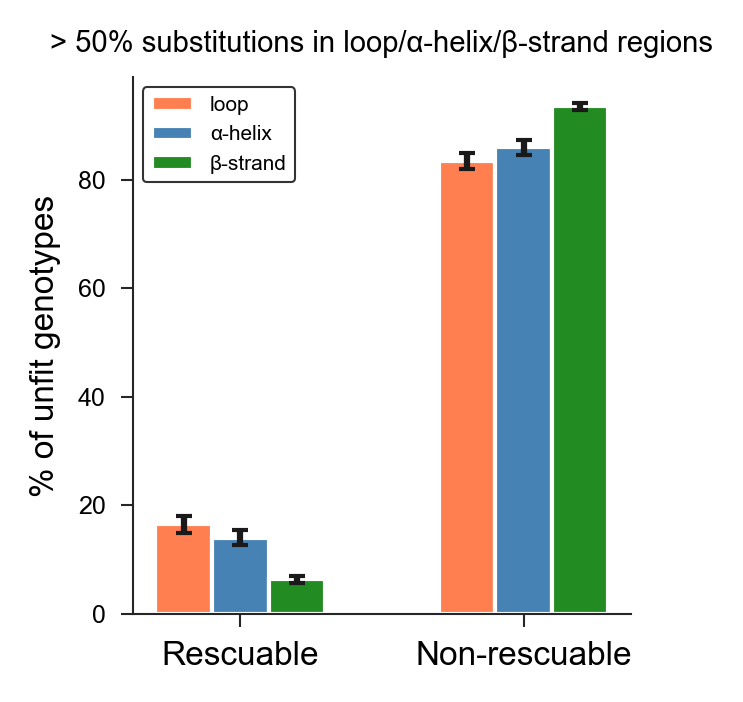

In [80]:
def returnMeanCI(input_array):
    return np.mean(input_array), np.std(input_array)

meanloop_rescuble ,stdloop_rescuable = returnMeanCI(loop_rescuableratio_list)
meanloop_nonrescuble ,stdloop_nonrescuable = returnMeanCI(loop_nonrescuableratio_list)

meanhelix_rescuble ,stdhelix_rescuable = returnMeanCI(helix_rescuableratio_list)
meanhelix_nonrescuble ,stdhelix_nonrescuable = returnMeanCI(helix_nonrescuableratio_list)

meanstrand_rescuble ,stdstrand_rescuable = returnMeanCI(strand_rescuableratio_list)
meanstrand_nonrescuble ,stdstrand_nonrescuable = returnMeanCI(strand_nonrescuableratio_list)

CIfactor = 1.96
plt.figure(figsize=(2.5,2.5))
ax = plt.subplot(111)
labels = ['Rescuable','Non-rescuable']
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax.bar(x - width, [meanloop_rescuble,meanloop_nonrescuble], yerr= [CIfactor*stdloop_rescuable, CIfactor*stdloop_nonrescuable],
                width=width,label='loop',color="coral",capsize=2)

rects2 =  ax.bar(x, [meanhelix_rescuble,meanhelix_nonrescuble], yerr = [ CIfactor*stdhelix_rescuable, CIfactor*stdhelix_nonrescuable],
                 width= width, label='α-helix',color="steelblue",capsize=2)

rects3 = ax.bar(x + width, [meanstrand_rescuble, meanstrand_nonrescuble],
                yerr= [CIfactor*stdstrand_rescuable, CIfactor*stdstrand_nonrescuable], 
                width=width, label='β-strand',color="forestgreen",capsize=2)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xticks(fontsize = 6,color = "black")
plt.yticks(fontsize = 6, color = "black")

#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=3)

l = plt.legend([rects1, rects2,rects3], ['loop', 'α-helix','β-strand'],
    loc='upper left', scatterpoints=1,edgecolor='black',fontsize=5,
        title_fontsize = 5)    
for text in l.get_texts():
    text.set_color("black")
    
legend = l.get_frame().set_linewidth(0.5)

plt.xticks(fontsize = 8)
plt.ylabel("% of unfit genotypes",fontsize=8,color = "black")
plt.title("> 50% substitutions in loop/α-helix/β-strand regions",fontsize=7,color = "black")  ### 标记的其实是mean +- 1 S.D. 包含2/3 的数据
plt.tight_layout()
#save the figure
plt.savefig(savedata_dir + "RescuableOrNotForloopHelixStrand.png",dpi = 300)

In [84]:
#using U test to see the difference
print(stats.mannwhitneyu(loop_rescuableratio_list,
                  helix_rescuableratio_list,
                         alternative = "greater"))

print(stats.mannwhitneyu(loop_rescuableratio_list,
                 strand_rescuableratio_list,
                         alternative = "greater"))

print(stats.mannwhitneyu(helix_rescuableratio_list,
                  strand_rescuableratio_list,
                       alternative = "greater"))
#--------------------------------------------------------------
print(stats.mannwhitneyu(loop_nonrescuableratio_list,
                  helix_nonrescuableratio_list,
                         alternative = "less"))

print(stats.mannwhitneyu(loop_nonrescuableratio_list,
                 strand_nonrescuableratio_list,
                         alternative = "less"))

print(stats.mannwhitneyu(helix_nonrescuableratio_list,
                  strand_nonrescuableratio_list,
                       alternative = "less"))

MannwhitneyuResult(statistic=247204.0, pvalue=4.713745163262625e-158)
MannwhitneyuResult(statistic=250000.0, pvalue=2.9278973914531006e-165)
MannwhitneyuResult(statistic=250000.0, pvalue=2.927844672685539e-165)
MannwhitneyuResult(statistic=2796.0, pvalue=4.713745163262625e-158)
MannwhitneyuResult(statistic=0.0, pvalue=2.9278973914531006e-165)
MannwhitneyuResult(statistic=0.0, pvalue=2.927844672685539e-165)


In [114]:
#interface if_rescuale analysis and also plot the figure
np.random.seed(0)
def bootstrapRescuability(datasize):
    select_row = np.random.choice(rescuabilityData.shape[0],datasize)
    select_data = rescuabilityData.iloc[select_row,:]
    IninterfaceRatio_data = select_data[select_data["interface_ratio"] >= 50]
    OutinterfaceRatio_data = select_data[select_data["interface_ratio"] < 50]
    #calculate the if_res ratio
    Ininterface_ifresN = IninterfaceRatio_data[IninterfaceRatio_data["if_res"] == 1].shape[0]
    Outinterface_ifresN = OutinterfaceRatio_data[OutinterfaceRatio_data["if_res"] == 1].shape[0]
    return Ininterface_ifresN/IninterfaceRatio_data.shape[0]*100, Outinterface_ifresN/OutinterfaceRatio_data.shape[0]*100

In [115]:
Ininterface_resRatio_list = [ ]
Outinterface_resRatio_list = [ ]
times = 500
for _ in range(500):
    ininterface_ratio, outinterface_ratio =  bootstrapRescuability(10000)
    Ininterface_resRatio_list.append(ininterface_ratio)
    Outinterface_resRatio_list.append(outinterface_ratio)

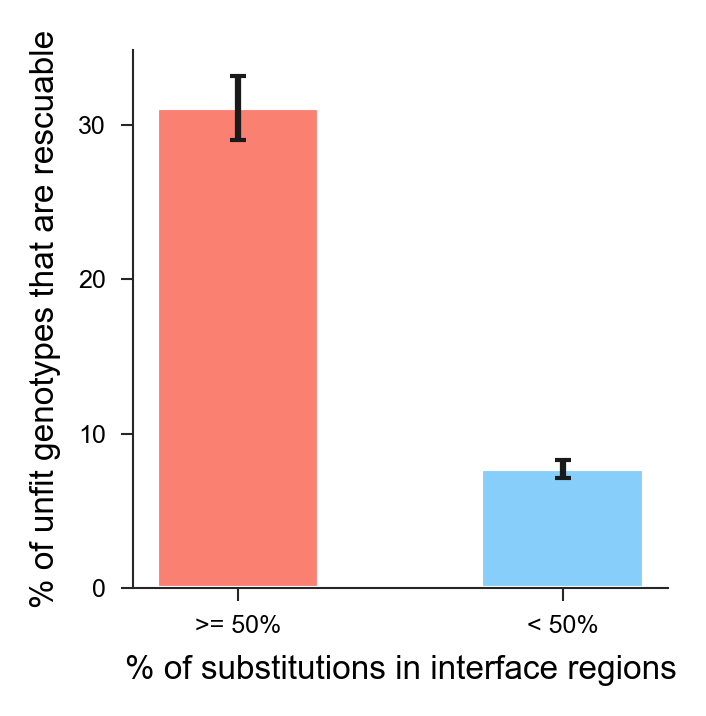

In [116]:
#plot the bar plot
interface_mean, interface_std = returnMeanCI(Ininterface_resRatio_list)
noninterface_mean, noninterface_std = returnMeanCI(Outinterface_resRatio_list)
plt.figure(figsize=(2.5,2.5))
ax = plt.subplot(111)
labels = ['>= 50%', '< 50%']
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
rects1 = ax.bar(0, [interface_mean], yerr= [CIfactor*interface_std],
                width=width,color="salmon",
        capsize=2)

rects2 =  ax.bar(1, [noninterface_mean], yerr = [CIfactor*noninterface_std],
                 width= width, color="lightskyblue",capsize=2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xticks(fontsize = 6,color = "black")
plt.yticks(fontsize = 6, color = "black")

#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=3)


plt.ylabel("% of unfit genotypes that are rescuable",fontsize=8,color = "black")
plt.xlabel("% of substitutions in interface regions",fontsize=8,color = "black")  ### 标记的其实是mean +- 1 S.D. 包含2/3 的数据
plt.tight_layout()
plt.savefig(savedata_dir + "Ifres_interface.png",dpi = 300)

In [118]:
print(stats.mannwhitneyu(Ininterface_resRatio_list, Outinterface_resRatio_list, alternative = "greater"))

MannwhitneyuResult(statistic=250000.0, pvalue=2.9279501111645856e-165)
